# ДИПЛОМНАЯ РАБОТА
## Курс: Python для анализа данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats

## 1. Загрузить файл HR.csv

In [2]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, минимум, максимум, среднее отклонение).

In [3]:
#Расчет основных статистик для переменных с помощью метода describe()
round(data.describe(), 2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [4]:
#Расчет моды
print('\nМода:')
data.mode().drop([1])


Мода:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


## 3. Рассчитать и визуализировать корреляционную матрицу для переменных.


МАТРИЦА КОРРЕЛЯЦИЙ


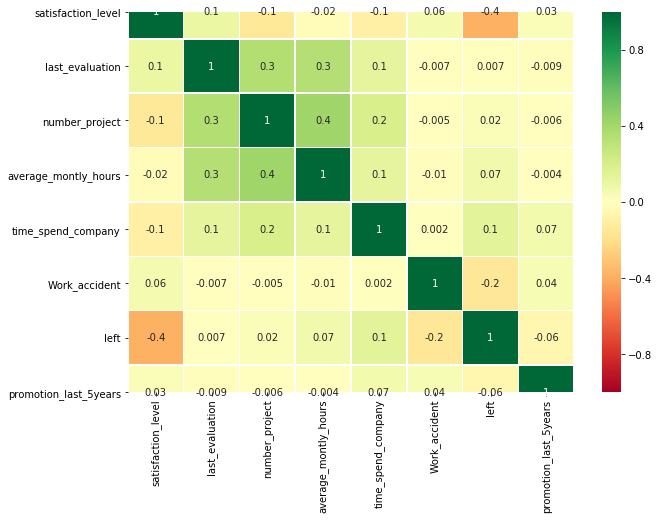

In [5]:
#Построим матрицу корреляций для таблицы
print('\nМАТРИЦА КОРРЕЛЯЦИЙ')
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data.corr(),annot=True, vmin=-1, vmax=1, center= 0, cmap= 'RdYlGn', linewidths=0.5, fmt='.1g')
plt.show()

## 4. Визуализировать несколько взаимосвязей между переменными.

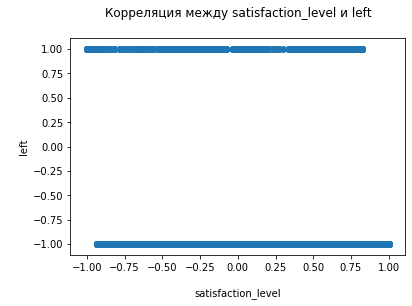

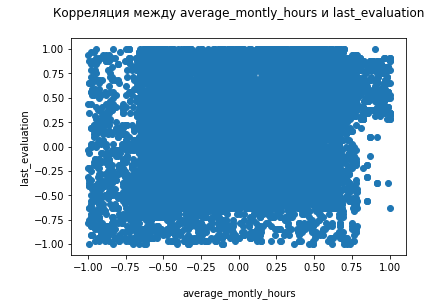

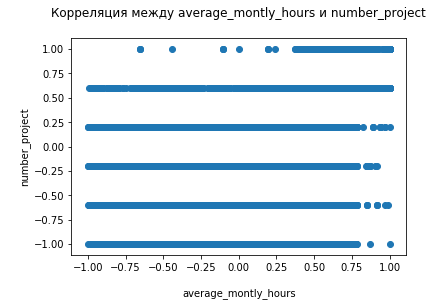

In [6]:
## НОРМАЛИЗАЦИЯ ПАРАМЕТРОВ
# Таблица только с численными данными
data_new = data.drop('sales', 1).drop('salary', 1)
data_new

# Выделение колонок в отдельный список
headers = list(data_new.columns.values)

# Нормализация параметров
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(data_new)
df_norm = pd.DataFrame(np_scaled)

#Восстановление названия колонок
df_norm.columns = headers

##ПОСТРОЕНИЕ ГРАФИКОВ
# График зависимости между satisfaction_level и left
plt.scatter(df_norm['satisfaction_level'], df_norm['left'])
plt.title('Корреляция между satisfaction_level и left\n')
plt.xlabel('\nsatisfaction_level')
plt.ylabel('\nleft')
plt.show()

# График зависимости между average_montly_hours и last_evaluation
plt.scatter(df_norm['average_montly_hours'], df_norm['last_evaluation'])
plt.title('Корреляция между average_montly_hours и last_evaluation\n')
plt.xlabel('\naverage_montly_hours')
plt.ylabel('\nlast_evaluation')
plt.show()

# График зависимости между average_montly_hours и number_project
plt.scatter(df_norm['average_montly_hours'], df_norm['number_project'])
plt.title('Корреляция между average_montly_hours и number_project\n')
plt.xlabel('\naverage_montly_hours')
plt.ylabel('\nnumber_project')
plt.show()

## 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

### Метод 1

In [7]:
# Взаимосвязь между satisfaction_level и left
stats.ttest_ind(data.satisfaction_level, data.left)

Ttest_indResult(statistic=93.06077566920372, pvalue=0.0)

p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

In [8]:
# Взаимосвязь между Work_accident и left
stats.ttest_ind(data.Work_accident, data.left)

Ttest_indResult(statistic=-20.724471296371643, pvalue=9.625063899986344e-95)

p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

In [9]:
# Взаимосвязь между Work_accident и satisfaction_level
stats.ttest_ind(data.Work_accident, data.satisfaction_level)

Ttest_indResult(statistic=-133.13298501842021, pvalue=0.0)

p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.


In [10]:
# Взаимосвязь между promotion_last_5years и satisfaction_level
stats.ttest_ind(data.promotion_last_5years, data.satisfaction_level)

Ttest_indResult(statistic=-252.03082389726003, pvalue=0.0)

p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

### Метод 2 на примере satisfaction_level и left

In [11]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [12]:
import researchpy as rp
# Showing descriptive statistics from researchpy.summary_cont()
rp.summary_cont(data.groupby('satisfaction_level')['left'])

,N,Mean,SD,SE,95% Conf.,Interval
satisfaction_level,,,,,,
0.09,195,1.000000,0.000000,0.000000,1.000000,1.000000
0.10,358,1.000000,0.000000,0.000000,1.000000,1.000000
0.11,335,1.000000,0.000000,0.000000,1.000000,1.000000
0.12,30,0.133333,0.345746,0.063124,0.007495,0.259172
0.13,54,0.055556,0.231212,0.031464,-0.006693,0.117804
...,...,...,...,...,...,...
0.96,203,0.000000,0.000000,0.000000,0.000000,0.000000
0.97,176,0.000000,0.000000,0.000000,0.000000,0.000000
0.98,183,0.000000,0.000000,0.000000,0.000000,0.000000


N - количество элементов Mean - среднее значение SD - стандартное отклонение SE - стандартная ошибка (https://ru.wikipedia.org/wiki/Стандартная_ошибка)

Функция для подсчета t-test: https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [13]:
descriptives, results = rp.ttest(data.satisfaction_level, data.left)
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
1,left,14999.0,0.238083,0.425924,0.003478,0.231266,0.244899
2,combined,29998.0,0.425458,0.395880,0.002286,0.420978,0.429938


In [14]:
results

,Independent t-test,results
0,Difference (satisfaction_level - left) =,0.3748
1,Degrees of freedom =,29996.0000
2,t =,93.0608
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.0746
7,Hedge's g =,1.0746
8,Glass's delta =,1.5073
9,r =,0.4733


p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

## 6. Рассчитать сколько работников работает в каждом департаменте.

In [15]:
emloyees_count = data.sales.value_counts().reset_index()
emloyees_count.columns = ['sales','emloyees']
emloyees_count

,sales,emloyees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


## 7. Показать распределение сотрудников по зарплатам.

Text(0, 0.5, '\nEmployees')

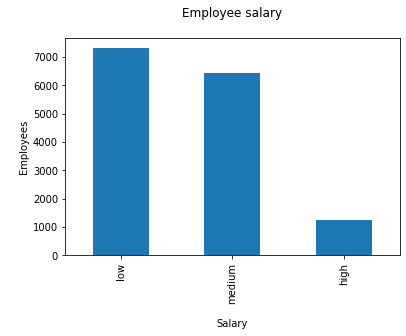

In [16]:
employee_salary = data.salary.value_counts()

employee_salary.plot(kind='bar')
plt.title('Employee salary\n')
plt.xlabel('\nSalary')
plt.ylabel('\nEmployees')

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

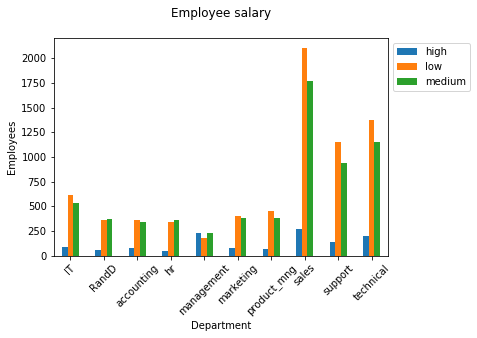

In [17]:
salary_by_department = data.groupby(['sales', 'salary'])['satisfaction_level'].count()

salary_by_department.unstack().plot(kind='bar', rot=45, stacked=False)
plt.title('Employee salary\n')
plt.xlabel('Department')
plt.ylabel('Employees')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))


## 9. Сколько сотрудников покинули компанию.

In [18]:
print('Компанию покинуло: ', data.left.sum(), 'сотрудников')

Компанию покинуло:  3571 сотрудников


## 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

### 10.1. Проверим гипотезу о том, что сотрудники без promotion_last_5years увольняются чаще.

In [19]:
promotion = data[data['promotion_last_5years']==1]['left']
no_promotion = data[data['promotion_last_5years']==0]['left']
descriptives, results = rp.ttest(promotion, no_promotion)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left    319.0  0.059561  0.237044  0.013272   0.033449  0.085673
1      left  14680.0  0.241962  0.428286  0.003535   0.235033  0.248891
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_____________________________
            Independent t-test     results
0  Difference (left - left) =      -0.1824
1        Degrees of freedom =   14997.0000
2                         t =      -7.5812
3     Two side test p value =       0.0000
4    Difference < 0 p value =       0.0000
5    Difference > 0 p value =       1.0000
6                 Cohen's d =      -0.4291
7                 Hedge's g =      -0.4290
8             Glass's delta =      -0.7695
9                         r =       0.0618


Вывод: гипотеза верна. Сотрудники без promotion_last_5years увольняются примерно в 4 раза чаще.

### 10.2. Проверим гипотезу о том, что сотрудники с salary ниже среднего увольняются чаще.

In [20]:
data.loc[ (data.salary.isin(['low'])), 'salary' ] = 0
data.loc[ (data.salary.isin(['medium'])), 'salary' ] = 5
data.loc[ (data.salary.isin(['high'])), 'salary' ] = 10

satisfaction = data[data['salary'] >= 5]['left']
no_satisfaction = data[data['salary'] < 5]['left']
descriptives, results = rp.ttest(satisfaction, no_satisfaction)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7683.0  0.182090  0.385944  0.004403   0.173459  0.190722
1      left   7316.0  0.296884  0.456916  0.005342   0.286412  0.307355
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_____________________________
            Independent t-test     results
0  Difference (left - left) =      -0.1148
1        Degrees of freedom =   14997.0000
2                         t =     -16.6501
3     Two side test p value =       0.0000
4    Difference < 0 p value =       0.0000
5    Difference > 0 p value =       1.0000
6                 Cohen's d =      -0.2720
7                 Hedge's g =      -0.2720
8             Glass's delta =      -0.2974
9                         r =       0.1347


Вывод: гипотеза верна. Сотрудники с salary ниже medium  увольняются чаще.

### 10.3. Проверим гипотезу о том, что сотрудники с Work_accident увольняются чаще.

In [21]:
accident = data[data['Work_accident']==1].left
no_accident = data[data['Work_accident']==0].left
descriptives, results = rp.ttest(accident, no_accident)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   2169.0  0.077916  0.268101  0.005757   0.066627  0.089205
1      left  12830.0  0.265160  0.441435  0.003897   0.257521  0.272799
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_____________________________
            Independent t-test     results
0  Difference (left - left) =      -0.1872
1        Degrees of freedom =   14997.0000
2                         t =     -19.1658
3     Two side test p value =       0.0000
4    Difference < 0 p value =       0.0000
5    Difference > 0 p value =       1.0000
6                 Cohen's d =      -0.4450
7                 Hedge's g =      -0.4449
8             Glass's delta =      -0.6984
9                         r =       0.1546


Вывод: гипотеза неверна, поскольку p-value < 0,05, а среднее значение уволенных сотрудников с Work_accident меньше остальных.